# Data Loading_파일 불러오기

In [144]:
# import module

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [145]:
# read file

file_path = '../data/iris.data'
index = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data = pd.read_csv(file_path, header = None )
df = pd.DataFrame(data)

df.columns = index

df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Loading_그래프로 확인

In [146]:
#import module

import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Classify iris')

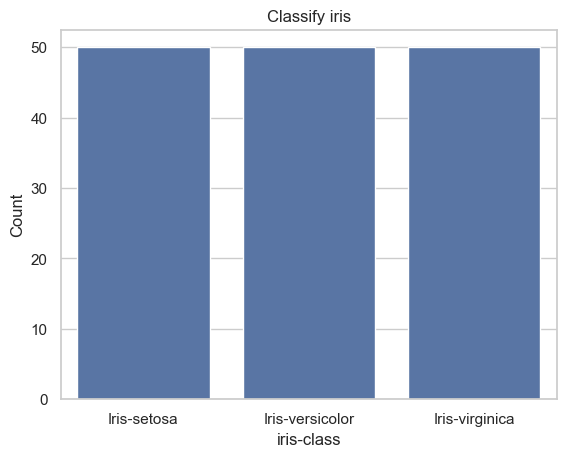

In [147]:
# Check class imbalance with graph

sns.countplot(data = df, x = "class")
plt.xlabel("iris-class")
plt.ylabel("Count")
plt.title("Classify iris")

# Data Cleaning_결측치 제거

In [148]:
# null값이 있는지 확인

df.isnull().sum()

# null값이 있을 경우 dropna()함수로 행 제거할 수 있음
# df = df.dropna()


sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

# Data Cleaning_산점도 확인(outlier)

Text(0.5, 1.0, 'Scatter')

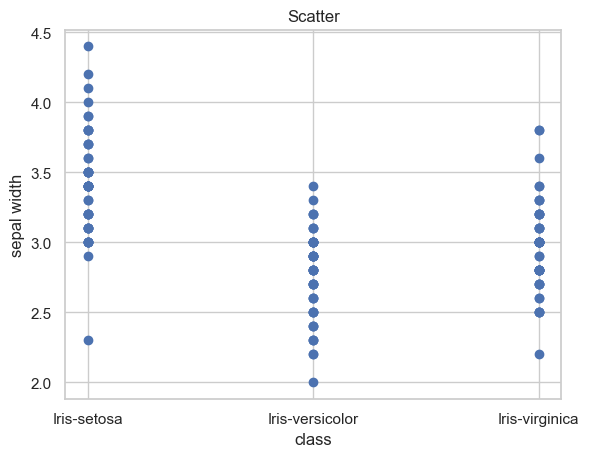

In [149]:
# DataFrame 생성 후 plt로 scatter 그려 outlier 확인

plt.scatter(df['class'], df['sepal width'])
plt.xlabel("class")
plt.ylabel("sepal width")
plt.title("Scatter")

# Data Cleaning_Boxplot

C:\Users\황주신\AppData\Local\Temp\ipykernel_14548\3653250962.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "sepal width", data = df, palette = "Set3")


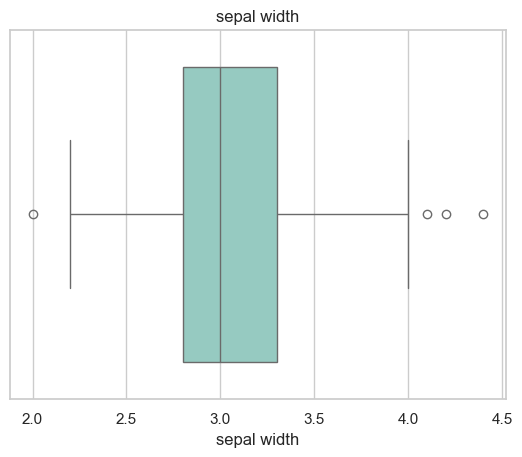

In [150]:
# sns로 boxplot 그려 outlier 확인

sns.set_theme(style = "whitegrid")
sns.boxplot(x = "sepal width", data = df, palette = "Set3")
plt.title("sepal width")
plt.show()

# Data Cleaning_Outlier 제거

In [151]:
#outlier 제거

df = df.drop(df[df['sepal width'] == 2.0].index)
df = df.drop(df[df['sepal width'] > 4.0].index)

Text(0.5, 1.0, 'Scatter')

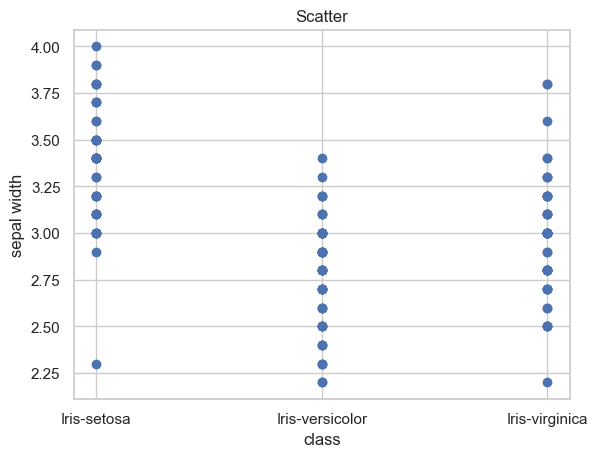

In [152]:
# plt.scatter로 잘 제거되었는지 확인

plt.scatter(df['class'], df['sepal width'])
plt.xlabel("class")
plt.ylabel("sepal width")
plt.title("Scatter")

C:\Users\황주신\AppData\Local\Temp\ipykernel_14548\990097521.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "sepal width", data = df, palette = "Set3")


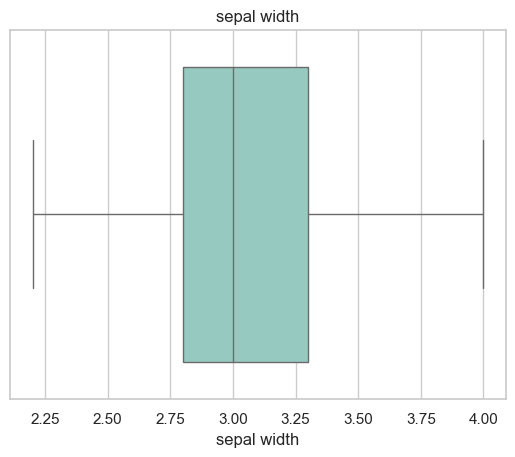

In [153]:
# sns.boxplot으로 잘 제거되었는지 확인

sns.set_theme(style = "whitegrid")
sns.boxplot(x = "sepal width", data = df, palette = "Set3")
plt.title("sepal width")
plt.show()

# feature와 label 나누기

In [154]:
X = df.drop('class', axis = 1)
Y = df['class']

print(X.head())
print()
print(Y.value_counts())

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

class
Iris-virginica     50
Iris-versicolor    49
Iris-setosa        47
Name: count, dtype: int64


# Train 데이터와 Test 데이터 나누기

In [155]:
# split X_train, Y_train, X_test, Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Data Scaling

In [156]:
# module import

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [157]:
# MinMaxScaler()를 사용한 data scaling
scaler_minmax = MinMaxScaler()
X_train_scaled = scaler_minmax.fit_transform(X_train)
X_test_scaled = scaler_minmax.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,
                                 index = X_train.index,
                                 columns = X_train.columns) 
X_train_scaled_df.head()

,sepal length,sepal width,petal length,petal width
80,0.333333,0.111111,0.474576,0.416667
19,0.222222,0.888889,0.084746,0.083333
48,0.277778,0.833333,0.084746,0.041667
53,0.333333,0.055556,0.508475,0.500000
47,0.083333,0.555556,0.067797,0.041667


In [158]:
#StandardScaler()를 사용한 data scaling
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,
                                 index = X_train.index,
                                 columns = X_train.columns) 
X_train_scaled_df.head()

,sepal length,sepal width,petal length,petal width
80,-0.453475,-1.618476,-0.042179,-0.188206
19,-0.923145,1.957585,-1.350708,-1.240344
48,-0.688310,1.702152,-1.350708,-1.371861
53,-0.453475,-1.873908,0.071606,0.074829
47,-1.510233,0.424987,-1.407601,-1.371861


# 모델 학습시키고 평가하기

In [159]:
# make model

iris_classification = LogisticRegression(random_state=0)
iris_classification_not_scaled = LogisticRegression(random_state = 0)

In [160]:
# fit model

iris_classification.fit(X_train_scaled, Y_train)
iris_classification_not_scaled.fit(X_train, Y_train)


LogisticRegression(random_state=0)

In [161]:
# test model

pred_iris = iris_classification.predict(X_test_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(Y_test, pred_iris))
print (confusion_matrix(Y_test, pred_iris))


--- Logistic Regression Classifier ---
1.0
[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]


In [162]:
# test model

pred_iris = iris_classification_not_scaled.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(Y_test, pred_iris))
print (confusion_matrix(Y_test, pred_iris))


--- Logistic Regression Classifier ---
1.0
[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
